In [1]:
# All Libraries required for this are listed below. The libraries pre-installed on Skills Network Labs are commented.
#%pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

# Importing Data

In [4]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
resp = requests.get(URL)
text = io.BytesIO(resp.content)
df = pd.read_csv(text)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's look at some samples rows from the dataset we loaded:

In [5]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


Let's verify the column names and the data type of each variable

In [7]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [15]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns

In [13]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

Verify the columns again

In [14]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

TASK 1.1: Let's try to understand the change in average estimated fire area over time
(use pandas to plot)

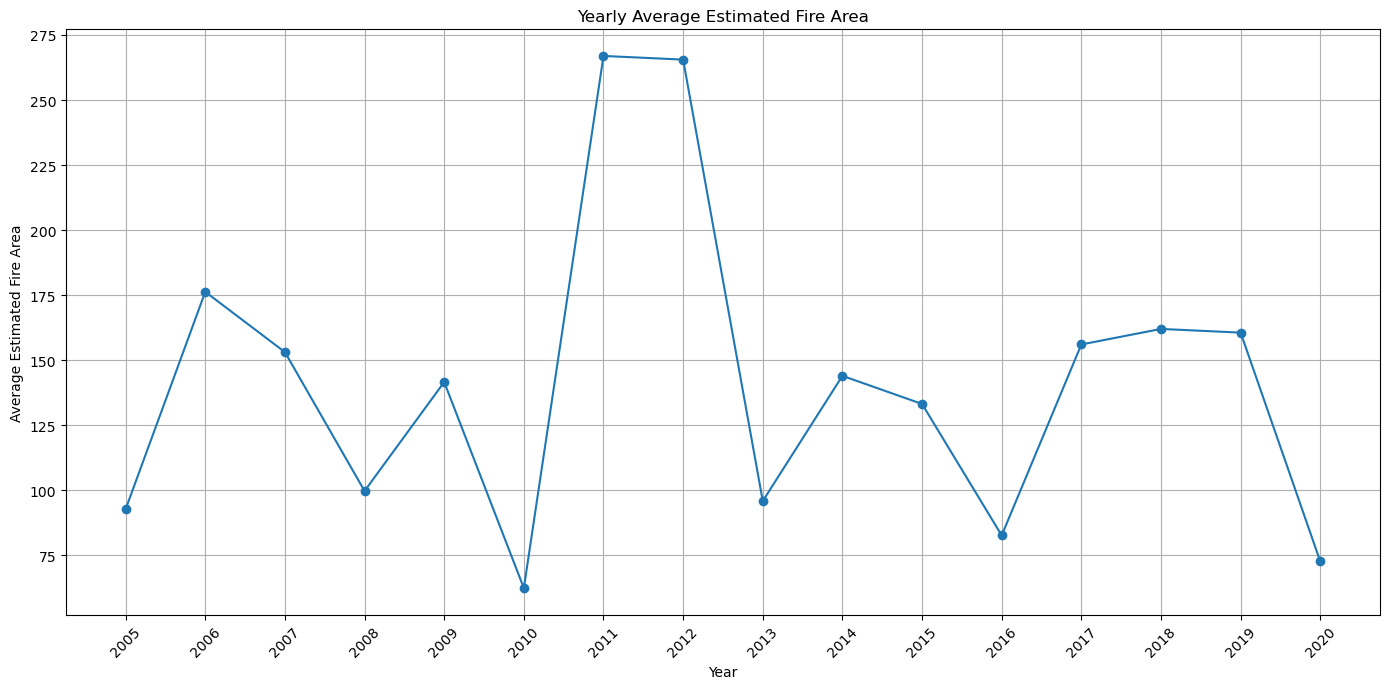

In [38]:

# Calculate the yearly average of the 'Estimated_fire_area'
yearly_average = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(yearly_average['Year'], yearly_average['Estimated_fire_area'], marker='o', linestyle='-')
plt.title('Yearly Average Estimated Fire Area')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area')
plt.grid(True)  # Add grid lines for better readability
plt.xticks(yearly_average['Year'], rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

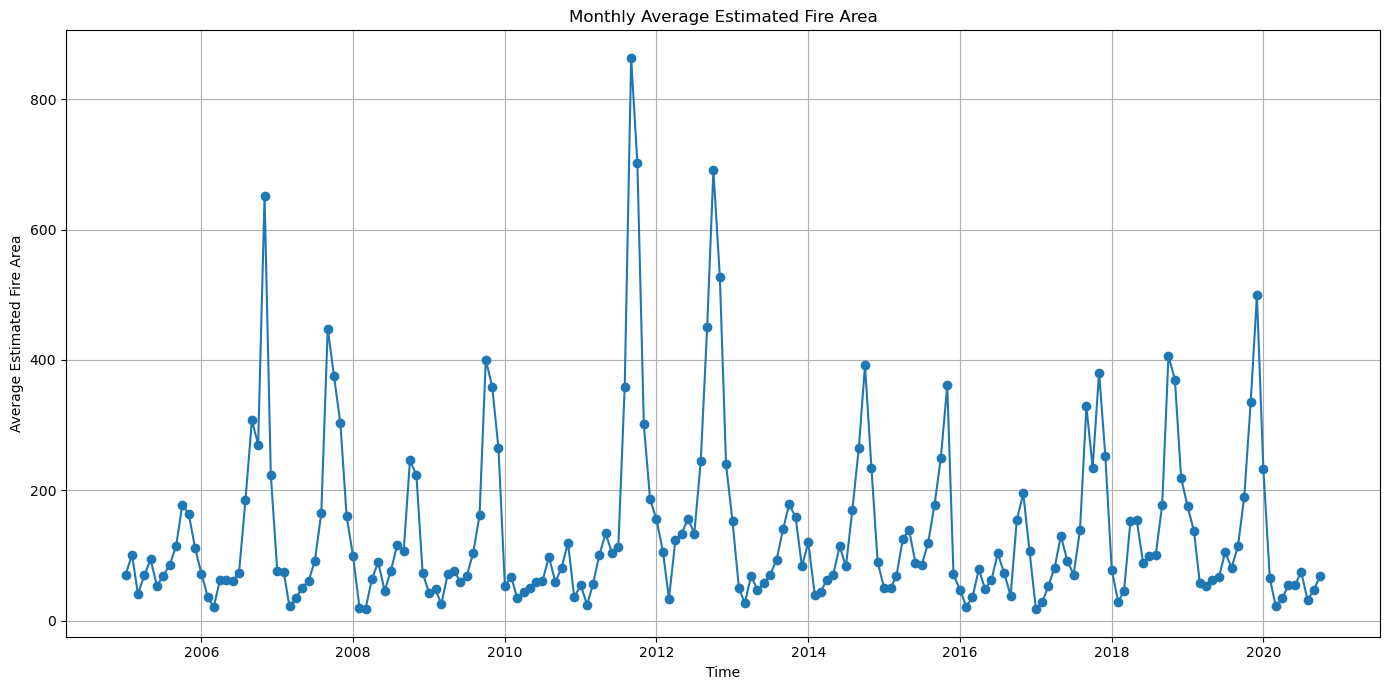

In [37]:

# Calculate the monthly average of the 'Estimated_fire_area'
monthly_average = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean().reset_index()

# Add a 'DateTime' column for plotting (using the first day of each month)
monthly_average['DateTime'] = pd.to_datetime(monthly_average[['Year', 'Month']].assign(DAY=1))

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size
plt.plot(monthly_average['DateTime'], monthly_average['Estimated_fire_area'], marker='o', linestyle='-')
plt.title('Monthly Average Estimated Fire Area')
plt.xlabel('Time')
plt.ylabel('Average Estimated Fire Area')
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust the padding of the plot
plt.show()


In [24]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

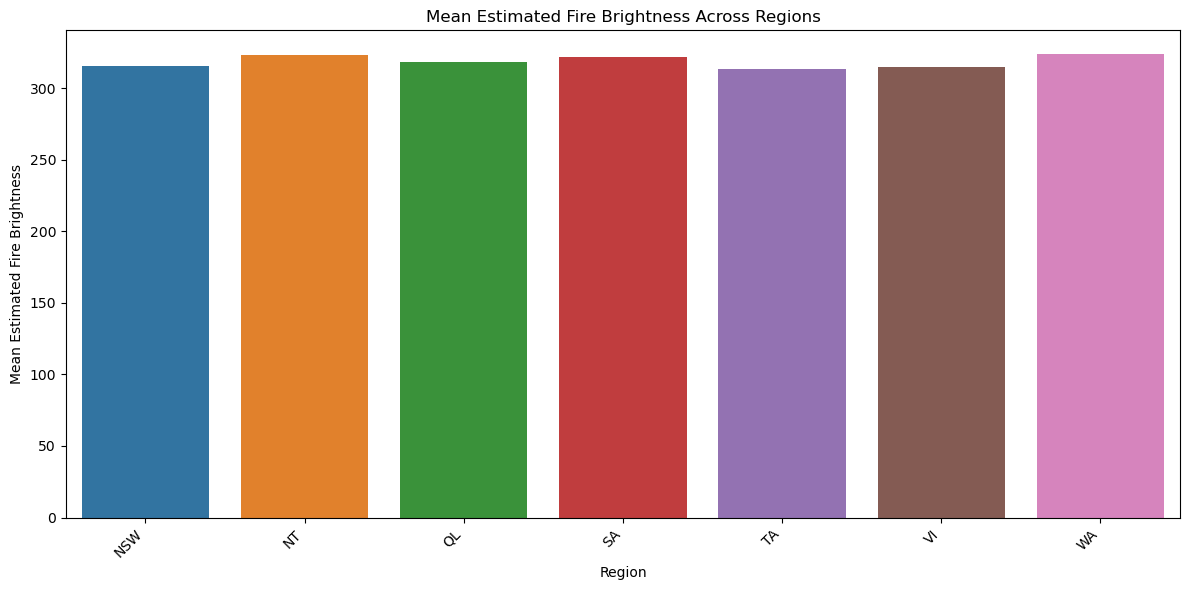

In [36]:

# Calculate the mean estimated fire brightness for each region
mean_brightness_per_region = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=mean_brightness_per_region)

# Enhance the plot
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better visibility
plt.title('Mean Estimated Fire Brightness Across Regions')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness')
plt.tight_layout()  # Adjust the layout
plt.show()

TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions
we will develop a pie chart for this

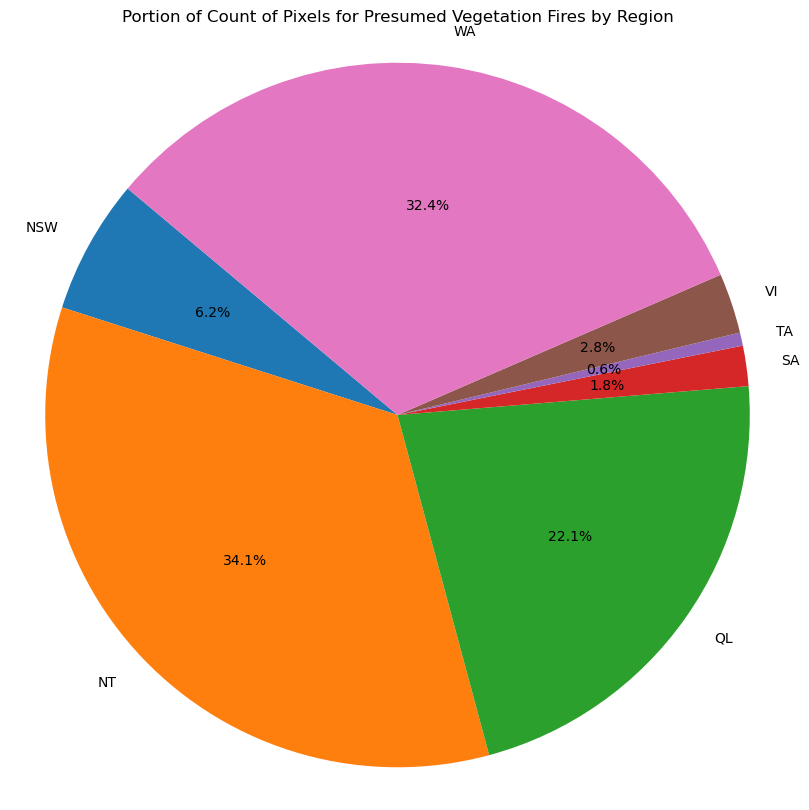

In [34]:
# Assuming 'df' is your DataFrame and it includes a 'Region' and a 'Count' column

# Group the data by 'Region' and sum the 'Count'
counts_per_region = df.groupby('Region')['Count'].sum()

# Create a pie chart
plt.figure(figsize=(10, 10))  # Set the figure size
plt.pie(counts_per_region, labels=counts_per_region.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portion of Count of Pixels for Presumed Vegetation Fires by Region')
plt.show()

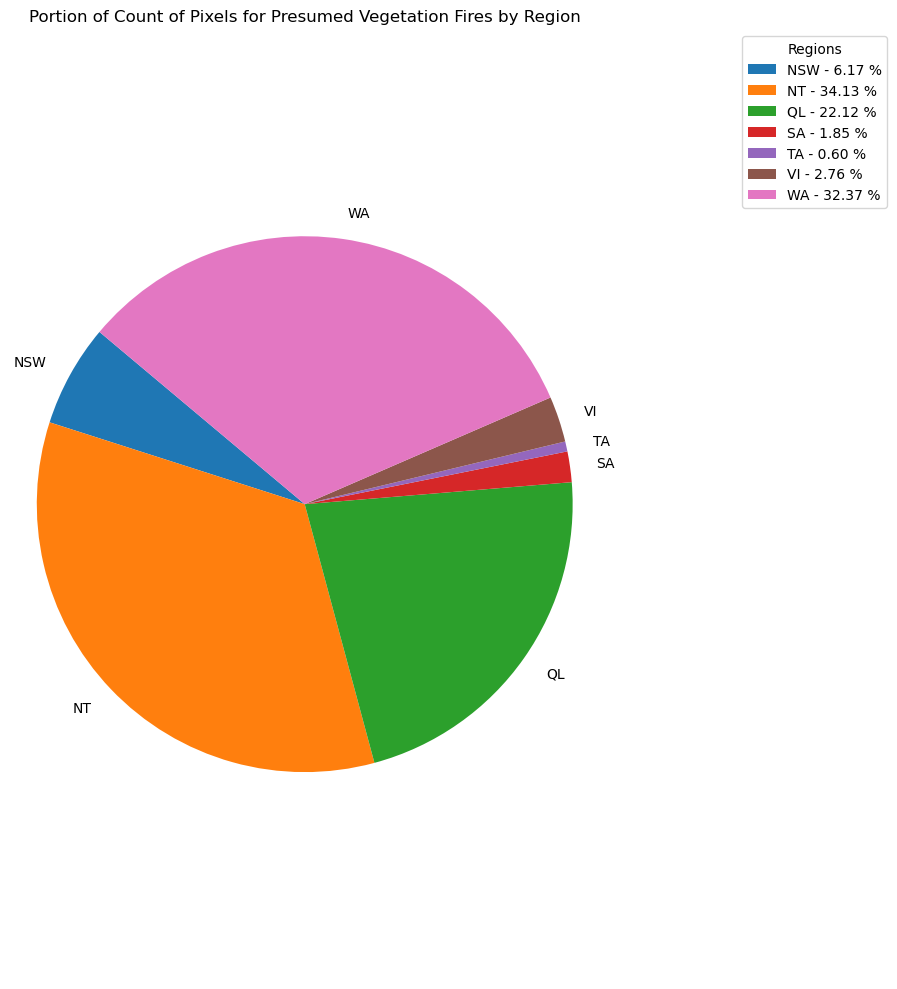

In [39]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it includes a 'Region' and a 'Count' column

# Group the data by 'Region' and sum the 'Count'
region_counts = df.groupby('Region')['Count'].sum()

# Create a pie chart without the 'autopct'
plt.figure(figsize=(10, 10))  # Set the figure size
plt.pie(region_counts, labels=region_counts.index, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Portion of Count of Pixels for Presumed Vegetation Fires by Region')

# Create a list of labels with the percentage for the legend
legend_labels = ['{0} - {1:1.2f} %'.format(i, k / region_counts.sum() * 100) for i, k in zip(region_counts.index, region_counts)]

# Add the legend to the chart
plt.legend(legend_labels, title="Regions", loc="best", bbox_to_anchor=(1, 0, 0.5, 1))

# To prevent the figure from being cut off when saving or displaying
plt.tight_layout()

# Display the chart
plt.show()


TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness
Using Matplotlib to create the histogram¶